In [22]:
from matplotlib import pyplot
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras.preprocessing.sequence import pad_sequences
import ujson
from pathlib import Path
import numpy as np

In [2]:

# Se especifica el path del directorio que tiene los archivos json con los datos de los acelerometros capturados en edge impulse
DATASET_PATH = "..\data\Acelerometro"
data_directory = Path(DATASET_PATH)

# Se obtienen los archivos json del directorio
json_files = list(data_directory.glob('*.json'))
X = []
Y = []

# Se leen los archivos json y se obtienen los valores de los acelerometros y las etiquetas
for filename in json_files:
    with open(filename, 'r') as json_file:
        data = ujson.load(json_file)
        X.append(data['payload']['values'])
        label = filename.name.split('.')[0]
        Y.append(label)
        
X = pad_sequences(X, padding='post', dtype='float32')
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)
print(X)
print(Y)


(61, 94, 3)
(61,)
[[[-5.8  3.6 10. ]
  [-7.8  3.8 12.5]
  [-7.9  3.9 12.3]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-3.9  4.2  9.2]
  [-4.4  4.5  9.9]
  [-5.8  4.9 13. ]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-3.2  1.1  5.6]
  [-3.4  0.8  6.2]
  [-3.9  1.3  6.2]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 ...

 [[-2.5 13.6 12.4]
  [-3.4 10.9 10.4]
  [-3.1  9.6  9.1]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-0.3  2.2  3.4]
  [ 0.5  2.1  1.3]
  [ 1.6  2.  -1.2]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-6.9 11.3 22.1]
  [-6.4 10.9 20.7]
  [-5.1 10.  17.6]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]]
['bajar escaleras' 'bajar escaleras' 'bajar escaleras' 'bajar escaleras'
 'bajar escaleras' 'bajar escaleras' 'bajar escaleras' 'bajar escaleras'
 'bajar escaleras' 'bajar escaleras' 'bajar escaleras' 'bajar escaleras'
 'caminar' 'caminar' 'cam

In [3]:
Y = LabelEncoder().fit_transform(Y)
Y = keras.utils.to_categorical(Y)

In [4]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42, 94, 3)
(42, 5)
(19, 94, 3)
(19, 5)


In [6]:
print(X_train)

[[[-3.6  5.4  2.7]
  [-5.6  6.6  3.3]
  [-6.   6.7  3.5]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-1.5  9.8 17. ]
  [-2.4  9.3 13.5]
  [-2.8  8.3 10.5]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-7.3  4.3  5.9]
  [-7.5  2.5  4.8]
  [-8.2  1.5  3.3]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 ...

 [[ 0.9 -1.1  2.5]
  [ 0.8 -1.   2. ]
  [ 1.3 -0.7  0.5]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[ 0.2  4.2  3.5]
  [ 0.3  4.3  3.6]
  [ 0.4  4.5  4.2]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[ 0.4  3.3  4.3]
  [ 0.6  3.3  5.1]
  [ 0.2  3.6  5.3]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]]


In [7]:
# Se realiza un aplanado de los datos para que puedan ser procesados por la red neuronal
X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

**Modelo MLP

In [8]:
from keras.layers import *  
from keras.models import Sequential
# Determinar la forma de entrada y el número de clases
input_shape = X_train.shape[1]
num_classes = y_train.shape[1] if len(y_train.shape) > 1 else np.max(y_train) + 1

# Crear el modelo
model = Sequential()
model.add(Input(shape=(X_train_flattened.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1840 - loss: 5.2634
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2054 - loss: 2.3668  
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5739 - loss: 1.3158  
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7158 - loss: 0.9593 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7684 - loss: 0.7144 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7634 - loss: 0.5441  
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8527 - loss: 0.3277 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9474 - loss: 0.2438 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9737 - loss: 0.2099 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9737 - loss: 0.1831 


In [9]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test_flattened, y_test)
print('Precisión en el conjunto de prueba:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.7895 - loss: 0.9338
Precisión en el conjunto de prueba: 0.7894737124443054


In [10]:
y_pred_rf = model.predict(X_test_flattened)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [11]:
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.33      1.00      0.50         2
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3

    accuracy                           0.79        19
   macro avg       0.87      0.81      0.77        19
weighted avg       0.93      0.79      0.80        19



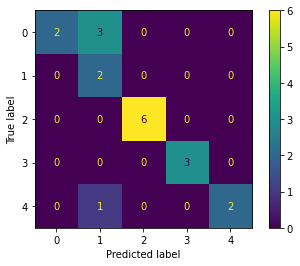

In [12]:
# Se obtiene la matriz de confusión
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()

** Modelo Convolucional 1D

In [13]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Determinar la forma de entrada y el número de clases
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1] if len(y_train.shape) > 1 else np.max(y_train) + 1

# Crear el modelo
model = Sequential()
model.add(Input(shape=(input_shape)))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2421 - loss: 2.5218
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4683 - loss: 1.4480
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 1.1299
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8368 - loss: 0.8391 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8527 - loss: 0.6653 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9211 - loss: 0.4539
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9841 - loss: 0.3487
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9737 - loss: 0.2450
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1720
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1203 


In [14]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.251912385225296
Test Accuracy: 0.9473684430122375


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3

    accuracy                           0.95        19
   macro avg       0.97      0.93      0.94        19
weighted avg       0.95      0.95      0.94        19



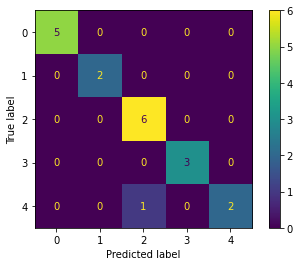

In [15]:
# Obtener las predicciones de clase
y_pred_rf = model.predict(X_test)
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

# Se obtiene la matriz de confusión
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()

** Modelo Redes Recurrentes

In [16]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Determinar la forma de entrada y el número de clases
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1] if len(y_train.shape) > 1 else np.max(y_train) + 1

# Crear el modelo
model = Sequential()
model.add(Input(shape=(input_shape)))
model.add(SimpleRNN(50, return_sequences=True))
model.add(SimpleRNN(50))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=25)

Epoch 1/25


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1210 - loss: 1.7395
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4261 - loss: 1.4596
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5739 - loss: 1.3277
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6632 - loss: 1.2086
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7421 - loss: 1.1081
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7842 - loss: 1.0346
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6895 - loss: 0.9775
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7525 - loss: 0.9051
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8160 - loss: 0.8459
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7421 - loss: 0.8089
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8051 - loss: 0.7105
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7946 - loss: 0.7043
Epoch 13/25


In [17]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.7596108317375183
Test Accuracy: 0.7368420958518982


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         6
           3       0.50      0.67      0.57         3
           4       1.00      0.67      0.80         3

    accuracy                           0.74        19
   macro avg       0.73      0.75      0.71        19
weighted avg       0.78      0.74      0.73        19



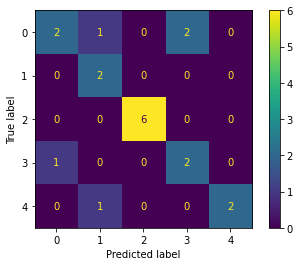

In [18]:
# Obtener las predicciones de clase
y_pred_rf = model.predict(X_test)
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

# Se obtiene la matriz de confusión
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()

In [19]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Determinar la forma de entrada y el número de clases
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1] if len(y_train.shape) > 1 else np.max(y_train) + 1

# Crear el modelo
model = Sequential()
model.add(Input(shape=(input_shape)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.3209 - loss: 1.6051
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3527 - loss: 1.5698
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4003 - loss: 1.5362
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3998 - loss: 1.5084
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3686 - loss: 1.4788
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3686 - loss: 1.4450
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3894 - loss: 1.4074
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3998 - loss: 1.3656
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4157 - loss: 1.3196
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4787 - loss: 1.2943
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5055 - loss: 1.2718
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5471 - loss: 1.1957
E

In [20]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.6670518517494202
Test Accuracy: 0.7894737124443054


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      1.00      0.80         2
           2       1.00      0.50      0.67         6
           3       1.00      0.67      0.80         3
           4       0.50      1.00      0.67         3

    accuracy                           0.79        19
   macro avg       0.83      0.83      0.79        19
weighted avg       0.89      0.79      0.79        19



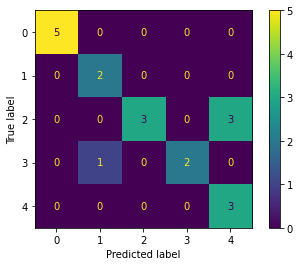

In [21]:
# Obtener las predicciones de clase
y_pred_rf = model.predict(X_test)
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

# Se obtiene la matriz de confusión
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()